<a href="https://colab.research.google.com/github/ucheokechukwu/tensorflow-deep-learning/blob/main/01_neural_network_regression_medical_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Cost Personal Dataset
Insurance Forecast with Linear Regression

* Link: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [37]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [39]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [41]:
set(insurance["region"])

{'northeast', 'northwest', 'southeast', 'southwest'}

## one hot encoding
In Pandas, the function for onehot encoding a DataFrame is `pd.get_dummies(DATAFRAME)`

In [42]:
insurance_onehot = pd.get_dummies(insurance)
insurance_onehot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [43]:
pd.get_dummies(insurance["region"])

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [44]:
# Create X & y labels:
X = insurance_onehot.drop("charges",axis=1)
y = insurance_onehot["charges"]

In [45]:
#Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# Convert to tensors (This is actually not required for Pandas DataFrame which is built on NumPy. So converting to tensors is redundant!)
X_train = tf.constant(X_train)
X_test = tf.constant(X_test)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)
                

In [46]:
X_test[:5]

<tf.Tensor: shape=(5, 11), dtype=float64, numpy=
array([[24.   , 29.3  ,  0.   ,  0.   ,  1.   ,  1.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  1.   ],
       [19.   , 28.31 ,  0.   ,  1.   ,  0.   ,  0.   ,  1.   ,  0.   ,
         1.   ,  0.   ,  0.   ],
       [19.   , 27.6  ,  0.   ,  0.   ,  1.   ,  1.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  1.   ],
       [29.   , 38.94 ,  1.   ,  0.   ,  1.   ,  1.   ,  0.   ,  0.   ,
         0.   ,  1.   ,  0.   ],
       [36.   , 28.595,  3.   ,  0.   ,  1.   ,  1.   ,  0.   ,  0.   ,
         1.   ,  0.   ,  0.   ]])>

In [47]:
insurance_onehot.head(1)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.924,1,0,0,1,0,0,0,1


In [48]:
# Build a neural network":
# Create the model, compile the model, run the model summary then fit...
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, name="input_layer", input_shape=[11]),
    tf.keras.layers.Dense(1, name="hidden_layer")
], name="model_insurance")

model.compile(loss=tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")

model.summary()

Model: "model_insurance"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                120       
                                                                 
 hidden_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8332.6250 - mae: 8332.6250
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7723.8203 - mae: 7723.8203
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7579.9717 - mae: 7579.9717
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7622.2407 - mae: 7622.2407
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7693.0298 - mae: 7693.0298
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7541.5962 - mae: 7541.5962
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7643.0757 - mae: 7643.0757
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7433.6631 - mae: 7433.6631
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7649.1030 - mae: 7649.1030
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7513.7505 - mae: 7513.7505

In [50]:
# Copy / pasting my predictions function from the previous notebook:
def prediction_function (model, 
                         X_test=X_test,
                         y_true=y_test):
  
  """Function for evaluating the model. 
  Prints the data and reports the MAE & MSE.
  Return the predicted labels.
  """
  y_pred = model.predict(X_test)
  plt.scatter(y_test, y_test, c="g", label="Groundtruth")
  plt.scatter(y_test, y_pred, c="r", label="Predictions")
  plt.legend();
  mae_ = mae(y_true, y_pred).numpy()
  mse_ = mse(y_true, y_pred).numpy()
  print(f"The MAE is: {mae_}")
  print(f"The MSE is: {mse_}")
  return (y_pred, mae_, mse_)



def mae(y_true, y_preds):
  return tf.metrics.mean_absolute_error(y_true, tf.squeeze(tf.constant(y_preds)))

def mse(y_true, y_preds):
  return tf.metrics.mean_squared_error(y_true, tf.squeeze(tf.constant(y_preds)))

9/9 [==============================] - 0s 2ms/step
The MAE is: 6547.32421875
The MSE is: 144298720.0


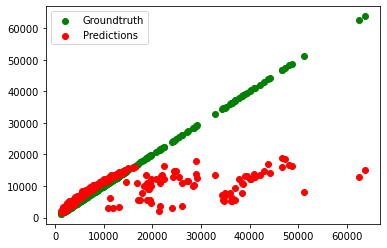

In [51]:
prediction_function(model);

In [52]:
y_train.ndim

1

In [53]:
y_pred = model.predict(X_test)
y_pred[:5]

9/9 [==============================] - 0s 2ms/step


array([[3455.1619],
       [5684.687 ],
       [2121.7412],
       [5228.7417],
       [8195.472 ]], dtype=float32)

In [54]:
y_test.shape

TensorShape([268])

In [55]:
y_pred.shape

(268, 1)

**Note to self**: Looks like the model sucks. Let's try to improve it.insurance_onehot

## Improving The Model.

*Base model*: 2 layers, SGD optimizer, 100 epochs
Strategies:

* Change the number of epochs to 250, then 200.

* Change the optimizer to Adam.

** Choose the best optimizer between Adam and SGD, and change the learning_rate:

* Change the number of layers:
** 1 layer
** 3 layers

* Pick the best of the above and change the number of epochs:
** 500 epochs (if overfitting, try 250 epochs) 


In [72]:
# Step. Changing the number of epochs.

model_epoch_tuning = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[11]),
    tf.keras.layers.Dense(1)
],name="model_epoch_tuning")

model_epoch_tuning.compile(loss=tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")

model_epoch_tuning.summary()

Model: "model_epoch_tuning"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 10)                120       
                                                                 
 dense_34 (Dense)            (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_epoch_tuning.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

9/9 [==============================] - 0s 2ms/step
The MAE is: 6827.44189453125
The MSE is: 83361400.0


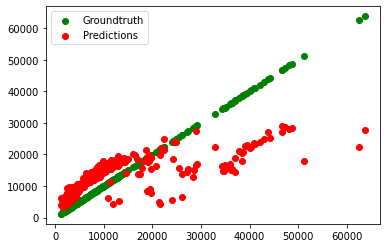

In [74]:
# Epoch Tuning =250
results_epoch_tuning=prediction_function(model_epoch_tuning)

9/9 [==============================] - 0s 2ms/step
The MAE is: 4797.35205078125
The MSE is: 83126904.0


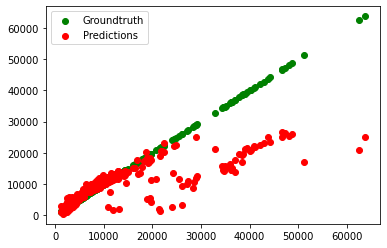

In [76]:
# Epoch Tuning = 100
results_epoch_tuning=prediction_function(model_epoch_tuning)

#### Observation: 
Better results at epochs = 100 over epochs = 250. Overfitting.

#### Changing the optimizer....

In [ ]:
# Run the model with Adam optimizer 
model_optimizer_tuning = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[11]),
    tf.keras.layers.Dense(1)
],name="model_optimizer_Adam_tuning")

model_optimizer_tuning.compile(loss=tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.Adam(),
              metrics="mae")

model_optimizer_tuning.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

9/9 [==============================] - 0s 2ms/step
The MAE is: 7914.2265625
The MSE is: 173731888.0


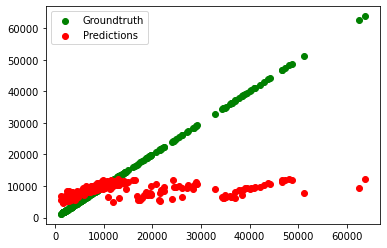

In [80]:
# Results with Adam optimizer
results_optimizer_tuning = prediction_function(model_optimizer_tuning)

####Observation: 
Adam optimizer performed worse. Will now change the layers, by adding an additional layer with 100 neurons

In [117]:
model_layers = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[11]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_layers.compile(loss=tf.keras.losses.mean_absolute_error,
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics="mae")
model_layers.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 100)               1200      
                                                                 
 dense_73 (Dense)            (None, 10)                1010      
                                                                 
 dense_74 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [118]:
history = model_layers.fit(X_train, y_train, epochs=200, verbose=2)

Epoch 1/200
34/34 - 1s - loss: 13140.1650 - mae: 13140.1650 - 767ms/epoch - 23ms/step
Epoch 2/200
34/34 - 0s - loss: 13003.6748 - mae: 13003.6748 - 59ms/epoch - 2ms/step
Epoch 3/200
34/34 - 0s - loss: 12709.3984 - mae: 12709.3984 - 56ms/epoch - 2ms/step
Epoch 4/200
34/34 - 0s - loss: 12114.7646 - mae: 12114.7646 - 56ms/epoch - 2ms/step
Epoch 5/200
34/34 - 0s - loss: 11074.5527 - mae: 11074.5527 - 56ms/epoch - 2ms/step
Epoch 6/200
34/34 - 0s - loss: 9644.3418 - mae: 9644.3418 - 59ms/epoch - 2ms/step
Epoch 7/200
34/34 - 0s - loss: 8261.0342 - mae: 8261.0342 - 61ms/epoch - 2ms/step
Epoch 8/200
34/34 - 0s - loss: 7487.6772 - mae: 7487.6772 - 56ms/epoch - 2ms/step
Epoch 9/200
34/34 - 0s - loss: 7343.2480 - mae: 7343.2480 - 56ms/epoch - 2ms/step
Epoch 10/200
34/34 - 0s - loss: 7319.5742 - mae: 7319.5742 - 60ms/epoch - 2ms/step
Epoch 11/200
34/34 - 0s - loss: 7300.1289 - mae: 7300.1289 - 55ms/epoch - 2ms/step
Epoch 12/200
34/34 - 0s - loss: 7278.2734 - mae: 7278.2734 - 58ms/epoch - 2ms/step
E

#### Observation:
the intial attempt to use `SGD()` gave `nan` for loss and mae, showing that the network was too complex for that optimizer
Therefore we switched it to the `Adam()` optimizer and got better results.
Ran the `model.fit` twice at several epochs setting to compare results.

9/9 [==============================] - 0s 2ms/step
The MAE is: 4161.9736328125
The MSE is: 65417972.0


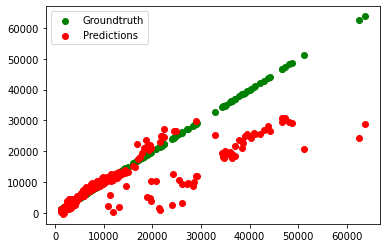

In [113]:
# epochs = 150
y=prediction_function(model_layers)

9/9 [==============================] - 0s 2ms/step
The MAE is: 5409.4638671875
The MSE is: 116856056.0


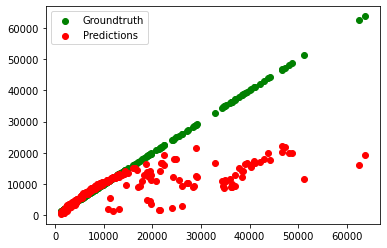

In [116]:
# epochs= 100
y=prediction_function(model_layers)

9/9 [==============================] - 0s 2ms/step
The MAE is: 4037.33203125
The MSE is: 59380040.0


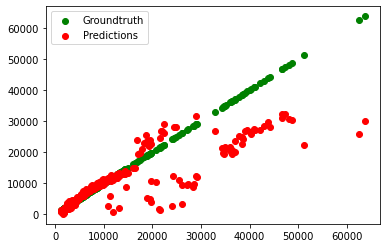

In [119]:
# epochs = 200
y=prediction_function(model_layers)

### Model `History` member

`History` logs the `loss` function against the `epochs` so by turning it into a DataFrame, you can create a graph showing how the Loss went down with each `model.fit()` run.

Text(0.5, 0, 'epochs')

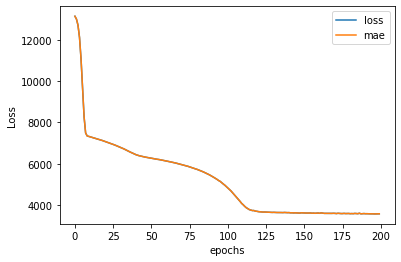

In [120]:
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("epochs")

## `EarlyStopping` Callback

**Question**: How long should we train for?

**Answer**: When the model stops improving

**Question**: How do we know that?

**Answer**: EarlyStopping Callback. It is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing Data - Normalization and Standardization

* Normalization - Converting all values from 0 to 1 while preserving the distribution of the data. `MinMaxScaler`

* Standardization - removes the mean and divides each value by the standard deviation. `StandardScaler`. This is used to deal outlier data. 

both functions are from SKLern 

In terms of scaling values, neural networks prefer normalization. 

**WHY should we do this?**
Because Algorithms converge faster and perform better when features are on a relatively similar scale. https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02


In [128]:
y = insurance_onehot["charges"].head()

In [124]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


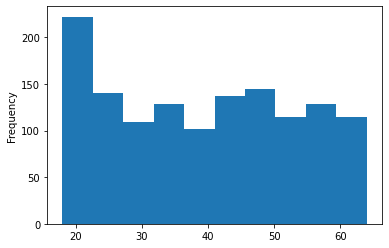

In [129]:
X.age.plot(kind="hist")

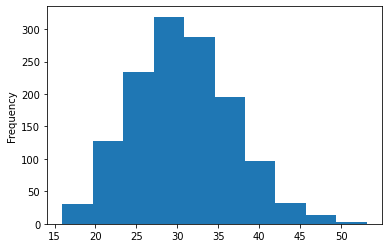

In [130]:
X.bmi.plot(kind="hist")

In [131]:
X.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

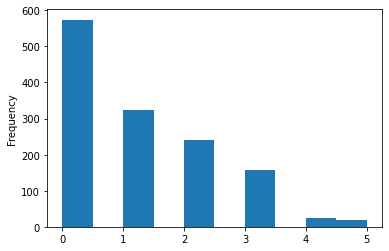

In [132]:
X.children.plot(kind="hist")